_Note, this NP is developed and in use for experiments with pydap by forman (25.08.2022).
please do not change it without a PR or better create a copy._

---

In [1]:
import json

import numpy as np
import xarray as xr

# needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
import pydap.client 
import pydap.cas.get_cookies

from xcube.core.arraystore import GenericArrayInfo
from xcube.core.arraystore import GenericArrayStore

Follwing code is borrowed from https://help.marine.copernicus.eu/en/articles/5182598-how-to-consume-the-opendap-api-and-cas-sso-using-python.

But note, we do not use the `xr.backends.PydapDataStore` as in the example.

In [2]:
def copernicusmarine_datastore(dataset_id, username, password):
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = pydap.cas.get_cookies.setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset_id}'
    try:
        pyd_dataset = pydap.client.open_url(url, session=session, user_charset='utf-8') 
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset_id}'
        pyd_dataset = pydap.client.open_url(url, session=session, user_charset='utf-8') 
    return url, pyd_dataset

In [3]:
dataset_id = "dataset-bal-analysis-forecast-wav-hourly"

with open("cmems-credentials.json") as fp:
    credentials = json.load(fp)
    username, password = credentials["username"], credentials["password"]

In [4]:
url, pyd_dataset = copernicusmarine_datastore(dataset_id, username, password)

In [5]:
url

'https://nrt.cmems-du.eu/thredds/dodsC/dataset-bal-analysis-forecast-wav-hourly'

Let's inspect the returned pydap dataset.
See also https://www.pydap.org/en/latest/client.html#accessing-gridded-data!

In [6]:
pyd_dataset

<DatasetType with children 'lat', 'lon', 'time', 'VHM0', 'VTPK', 'VTM10', 'VTM02', 'VMDR', 'VHM0_WW', 'VTM01_WW', 'VMDR_WW', 'VPED', 'VHM0_SW1', 'VTM01_SW1', 'VMDR_SW1', 'VHM0_SW2', 'VTM01_SW2', 'VMDR_SW2', 'VSDX', 'VSDY'>

In [7]:
pyd_dataset.attributes

{'NC_GLOBAL': {'Conventions': 'CF-1.0',
  'source': 'FMI-WAM_CMEMS',
  'institution': 'Baltic MFC, PU Finnish Meteorological Institute',
  'title': 'CMEMS WAM model fields (hourly)',
  'cmems_product_id': 'BALTICSEA_ANALYSISFORECAST_WAV_003_010',
  'westernmost_longitude': '9.0138',
  'easternmost_longitude': '30.2080',
  'southernmost_latitude': '53.0083',
  'northernmost_latitude': '65.9081',
  'grid_resolution': '1 nautical mile (ie. 0.0167 degrees northward; 0.0278 degrees eastward'},
 'DODS_EXTRA': {}}

In [8]:
global_attrs = pyd_dataset.attributes.get('NC_GLOBAL', {})

In [9]:
pyd_dataset.lat

<BaseType with data BaseProxy('https://nrt.cmems-du.eu/thredds/dodsC/dataset-bal-analysis-forecast-wav-hourly', 'lat', dtype('>f4'), (775,), (slice(None, None, None),))>

In [10]:
pyd_dataset.lon[0:10]

<BaseType with data array([9.013887 , 9.041664 , 9.069442 , 9.0972185, 9.124995 , 9.152772 ,
       9.18055  , 9.208326 , 9.236103 , 9.263881 ], dtype=float32)>

In [11]:
pyd_dataset.lat[0:10]

<BaseType with data array([53.00829 , 53.024956, 53.041622, 53.05829 , 53.074955, 53.091618,
       53.108284, 53.12495 , 53.141617, 53.158283], dtype=float32)>

In [12]:
pyd_dataset.time[0:10]

<BaseType with data array([1.5436260e+09, 1.5436296e+09, 1.5436332e+09, 1.5436368e+09,
       1.5436404e+09, 1.5436440e+09, 1.5436476e+09, 1.5436512e+09,
       1.5436548e+09, 1.5436584e+09])>

In [13]:
# This will lead to error "ValueError: buffer size must be a multiple of element size"
# pyd_dataset.VMDR[100, 300:310, 400:410]

In [14]:
pyd_dataset.VMDR.array[100, 300:310, 400:410]

<BaseType with data array([[[288.4607 , 287.9629 , 287.48666, 287.14572, 286.95096,
         286.83032, 286.69336, 286.45355, 286.07428, 285.66483],
        [287.7408 , 287.30734, 286.90234, 286.57925, 286.3968 ,
         286.31995, 286.24457, 286.14514, 285.93735, 285.63608],
        [287.04715, 286.70847, 286.34885, 285.9923 , 285.80377,
         285.74606, 285.71646, 285.67203, 285.55933, 285.33994],
        [286.47977, 286.2102 , 285.9278 , 285.59164, 285.406  ,
         285.34613, 285.3402 , 285.33102, 285.29425, 285.14996],
        [285.98584, 285.79605, 285.61185, 285.3545 , 285.19272,
         285.16455, 285.20557, 285.2506 , 285.24893, 285.14148],
        [285.5887 , 285.49182, 285.4014 , 285.2549 , 285.10303,
         285.0756 , 285.1475 , 285.23065, 285.2389 , 285.16354],
        [285.2081 , 285.19907, 285.1952 , 285.09195, 284.92102,
         284.864  , 284.9512 , 285.06113, 285.09802, 285.05173],
        [284.84332, 284.87265, 284.91058, 284.80957, 284.65436,
         284.

We now know enough to setup our own Zarr store:

In [15]:

def get_data_getter(name, pyd_var):
    """Get the chunk data getter for array named 
    *name* and pydap variable *var*.
    """
    def get_data(chunk_index, chunk_shape, array_info):
        
        # TODO (forman): move code block into GenericArrayStore
        shape = array_info["shape"]
        chunks = array_info["chunks"]
        array_index = tuple(slice(i * c, i * c + (c if (i + 1) * c <= s else s % c)) 
                            for i, c, s in zip(chunk_index, chunks, shape))
        
        display(f"Fetching {name} for chunk {chunk_index} at {array_index}")
        
        # pydap data access
        if hasattr(pyd_var, "array"):
            data = pyd_var.array[array_index]
        else:
            data = pyd_var[array_index]
        data = np.array(data)

        # TODO (forman): move code block into GenericArrayStore
        if data.shape != chunks:
            padding = tuple((0, 0 if (i + 1) * c <= s else c - s % c) 
                            for i, c, s in zip(chunk_index, chunks, shape))
            display(f"Pad!: {padding}")
            data = np.pad(data, padding, "constant")
        
        #display(data)
        return data
    return get_data


def get_array_infos(pyd_dataset):
    """Get the list of array infos from the list of pydap 
    variables in *pyd_dataset*.
    """
    array_infos = []
    for name, pyd_var in pyd_dataset.items():
        attrs = dict(pyd_var.attributes)
        # Note, it seems that there is no advantage in using the 
        # _ChunkSizes which come from original NetCDF files.
        # Users should specify the desired chunksizes on their own.
        # For example, coordinate variables should not be chunked at all!
        chunks = attrs.pop("_ChunkSizes", None)
        chunks = (chunks,) if isinstance(chunks, int) else \
            tuple(chunks) if chunks is not None else None
        fill_value = attrs.pop("_FillValue", None)
        array_info = GenericArrayInfo(
            name=name,
            dtype=pyd_var.dtype.str,
            dims=pyd_var.dimensions,
            shape=pyd_var.shape,
            chunks=chunks,
            fill_value=fill_value,
            get_data=get_data_getter(name, pyd_var),
            attrs=attrs,
            compressor=None,
            chunk_type="ndarray",
        )
        array_infos.append(array_info)
    return array_infos


In [16]:
array_infos = get_array_infos(pyd_dataset)
#array_infos

In [17]:
zarr_store = GenericArrayStore(*array_infos, attrs=global_attrs)

In [18]:
xr_dataset = xr.open_zarr(zarr_store)
xr_dataset

'Fetching time for chunk (0,) at (slice(0, 1024, None),)'

'Fetching time for chunk (32,) at (slice(32768, 32856, None),)'

'Pad!: ((0, 936),)'

'Fetching lat for chunk (0,) at (slice(0, 775, None),)'

'Fetching lon for chunk (0,) at (slice(0, 764, None),)'

'Fetching time for chunk (0,) at (slice(0, 1024, None),)'

'Fetching time for chunk (1,) at (slice(1024, 2048, None),)'

'Fetching time for chunk (2,) at (slice(2048, 3072, None),)'

'Fetching time for chunk (3,) at (slice(3072, 4096, None),)'

'Fetching time for chunk (4,) at (slice(4096, 5120, None),)'

'Fetching time for chunk (5,) at (slice(5120, 6144, None),)'

'Fetching time for chunk (6,) at (slice(6144, 7168, None),)'

'Fetching time for chunk (7,) at (slice(7168, 8192, None),)'

'Fetching time for chunk (8,) at (slice(8192, 9216, None),)'

'Fetching time for chunk (9,) at (slice(9216, 10240, None),)'

'Fetching time for chunk (10,) at (slice(10240, 11264, None),)'

'Fetching time for chunk (11,) at (slice(11264, 12288, None),)'

'Fetching time for chunk (12,) at (slice(12288, 13312, None),)'

'Fetching time for chunk (13,) at (slice(13312, 14336, None),)'

'Fetching time for chunk (14,) at (slice(14336, 15360, None),)'

'Fetching time for chunk (15,) at (slice(15360, 16384, None),)'

'Fetching time for chunk (16,) at (slice(16384, 17408, None),)'

'Fetching time for chunk (17,) at (slice(17408, 18432, None),)'

'Fetching time for chunk (18,) at (slice(18432, 19456, None),)'

'Fetching time for chunk (19,) at (slice(19456, 20480, None),)'

'Fetching time for chunk (20,) at (slice(20480, 21504, None),)'

'Fetching time for chunk (21,) at (slice(21504, 22528, None),)'

'Fetching time for chunk (22,) at (slice(22528, 23552, None),)'

'Fetching time for chunk (23,) at (slice(23552, 24576, None),)'

'Fetching time for chunk (24,) at (slice(24576, 25600, None),)'

'Fetching time for chunk (25,) at (slice(25600, 26624, None),)'

'Fetching time for chunk (26,) at (slice(26624, 27648, None),)'

'Fetching time for chunk (27,) at (slice(27648, 28672, None),)'

'Fetching time for chunk (28,) at (slice(28672, 29696, None),)'

'Fetching time for chunk (29,) at (slice(29696, 30720, None),)'

'Fetching time for chunk (30,) at (slice(30720, 31744, None),)'

'Fetching time for chunk (31,) at (slice(31744, 32768, None),)'

'Fetching time for chunk (32,) at (slice(32768, 32856, None),)'

'Pad!: ((0, 936),)'

<xarray.Dataset>
Dimensions:    (time: 32856, lat: 775, lon: 764)
Coordinates:
  * lat        (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon        (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time       (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-08-31
Data variables: (12/17)
    VHM0       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_SW1   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_SW2   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_WW    (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VMDR       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VMDR_SW1   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    ...         ...
    VTM01_SW1  (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM01_SW2  (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM01_WW   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM02      (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM10      (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTPK       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

In [19]:
xr_dataset.VHM0

<xarray.DataArray 'VHM0' (time: 32856, lat: 775, lon: 764)>
dask.array<open_dataset-a2ee5e84cfb130e223bcde0656d30a05VHM0, shape=(32856, 775, 764), dtype=float32, chunksize=(4, 481, 474), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-08-31
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_min:      0.0
    valid_max:      20.0

'Fetching VHM0 for chunk (0, 0, 1) at (slice(0, 4, None), slice(0, 481, None), slice(474, 764, None))'

'Fetching VHM0 for chunk (0, 0, 0) at (slice(0, 4, None), slice(0, 481, None), slice(0, 474, None))'

'Fetching VHM0 for chunk (0, 1, 0) at (slice(0, 4, None), slice(481, 775, None), slice(0, 474, None))'

'Fetching VHM0 for chunk (0, 1, 1) at (slice(0, 4, None), slice(481, 775, None), slice(474, 764, None))'

'Pad!: ((0, 0), (0, 187), (0, 184))'

'Pad!: ((0, 0), (0, 0), (0, 184))'

'Pad!: ((0, 0), (0, 187), (0, 0))'

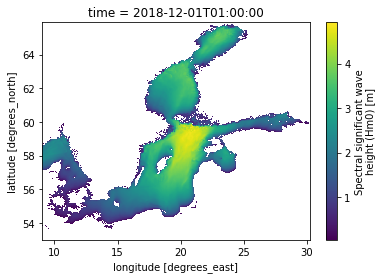

In [20]:
xr_dataset.VHM0[0].plot()

---

Test, if Zarr can work with numpy chunks rather than bytes:

In [21]:
from xcube.core.arraystore import dict_to_bytes, str_to_bytes

dtype = np.dtype(np.int16)
display(np.linspace(1, 4, 4, dtype=dtype))
dict_store = {
    ".zgroup": dict_to_bytes({
        "zarr_format": 2,        
    }),
    ".zattrs": dict_to_bytes({
    }),
    "x": str_to_bytes(""),
    "x/.zarray": dict_to_bytes({
        "zarr_format": 2,        
        "dtype": dtype.str,
        "shape": [8],
        "chunks": [4],
        "order": "C",
        "compressor": None,
        "filters": None,
        "fill_value": None,
    }),
    "x/.zattrs": dict_to_bytes({
        "_ARRAY_DIMENSIONS": ["x"],
    }),
    "x/0": np.linspace(1, 4, 4, dtype=dtype),
    "x/1": np.linspace(5, 8, 4, dtype=dtype),
}

array([1, 2, 3, 4], dtype=int16)

In [22]:
ds = xr.open_zarr(dict_store, consolidated=False)
ds

<xarray.Dataset>
Dimensions:  (x: 8)
Coordinates:
  * x        (x) int16 1 2 3 4 5 6 7 8
Data variables:
    *empty*

In [23]:
ds.x.values

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int16)

---

In [37]:
def get_it(chunk_index, array_info=45, chunk_info=None, **kwargs):
    pass

In [38]:
import inspect
get_data_signature = inspect.signature(get_it)
fas.parameters["array_info"].


45

In [39]:
fas.args[]

SyntaxError: invalid syntax (4023727464.py, line 1)